출처 
https://www.kaggle.com/c/melbourne-university-seizure-prediction/discussion/23552

https://www.kaggle.com/aperezhortal/eda-on-the-frequency-domain-fft

https://www.wavemetrics.com/products/igorpro/dataanalysis/signalprocessing/powerspectra

https://kor.midasuser.com/nfx/techpaper/keyword_view.asp?pg=13&sk=&bid=70&nCat=&nIndex=&sHtml=&idx=283

https://www.kaggle.com/theoviel/fast-fourier-transform-denoising

1. 주파수(Frequency)
2. 크기(Magnitude)
3. 위상(Phase)이 다른 정현파(sinusolida signal) 

 푸리에변환 - 조합된 정현파의 합 신호에서 그 신호를 구성하는 정현파들을 각각 분리하는 방법 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
is_local = False
if (is_local):
        print("fail")
else:
        PATH = "../input/earthquake_data/"

In [3]:
file_len = len(os.listdir(PATH))
f"파일 갯수는 {file_len!r} 입니다 "

'파일 갯수는 13 입니다 '

In [4]:
data_list = os.listdir(PATH)
data_list

['10599855_0_sigma_1_data (8th copy).csv',
 '10599855_0_sigma_1_data (copy).csv',
 '10599855_0_sigma_1_data (12th copy).csv',
 '10599855_0_sigma_1_data (11th copy).csv',
 '10599855_0_sigma_1_data (4th copy).csv',
 '10599855_0_sigma_1_data.csv',
 '10599855_0_sigma_1_data (7th copy).csv',
 '10599855_0_sigma_1_data (6th copy).csv',
 '10599855_0_sigma_1_data (another copy).csv',
 '10599855_0_sigma_1_data (5th copy).csv',
 '10599855_0_sigma_1_data (9th copy).csv',
 '10599855_0_sigma_1_data (10th copy).csv',
 '10599855_0_sigma_1_data (3rd copy).csv']

In [5]:
path = PATH + data_list[0] 
path
data_df = pd.read_csv(path, names=['time', '_x', '_y', '_z'],header=None, error_bad_lines=False )

In [6]:
data_df.head(5)

,time,_x,_y,_z
1514735578,0.000000,-6.050000e-10,5.920000e-10,1.400000e-09
1514735578,0.000417,-9.140000e-11,2.260000e-10,-1.380000e-10
1514735578,0.000833,-2.050000e-10,-1.050000e-09,-4.090000e-10
1514735578,0.001250,-1.800000e-10,5.180000e-10,-5.680000e-10
1514735578,0.001667,1.810000e-09,-1.210000e-09,3.860000e-10


In [7]:
signals = data_df.copy()
signals = signals.drop('time',axis=1)

In [8]:
signals.head(5)

,_x,_y,_z
1514735578,-6.050000e-10,5.920000e-10,1.400000e-09
1514735578,-9.140000e-11,2.260000e-10,-1.380000e-10
1514735578,-2.050000e-10,-1.050000e-09,-4.090000e-10
1514735578,-1.800000e-10,5.180000e-10,-5.680000e-10
1514735578,1.810000e-09,-1.210000e-09,3.860000e-10


In [9]:
signals.tail(5)

,_x,_y,_z
1514736004,-2.140000e-10,7.740000e-10,-3.790000e-11
1514736004,8.780000e-10,-1.500000e-09,6.300000e-11
1514736004,-8.740000e-10,-3.300000e-10,9.610000e-10
1514736004,-2.710000e-10,2.020000e-09,-1.380000e-09
1514736004,1.360000e-09,-1.020000e-09,-1.890000e-10


In [10]:
np_signals = np.array(signals).T.reshape((1, 3, len(signals['_x'])))

In [60]:
print(np_signals.shape[0])
print(np_signals.shape[1])
print(np_signals.shape[2])

1
3
17049


In [11]:
np_signals

array([[[-6.05e-10, -9.14e-11, -2.05e-10, ..., -8.74e-10, -2.71e-10,
          1.36e-09],
        [ 5.92e-10,  2.26e-10, -1.05e-09, ..., -3.30e-10,  2.02e-09,
         -1.02e-09],
        [ 1.40e-09, -1.38e-10, -4.09e-10, ...,  9.61e-10, -1.38e-09,
         -1.89e-10]]])

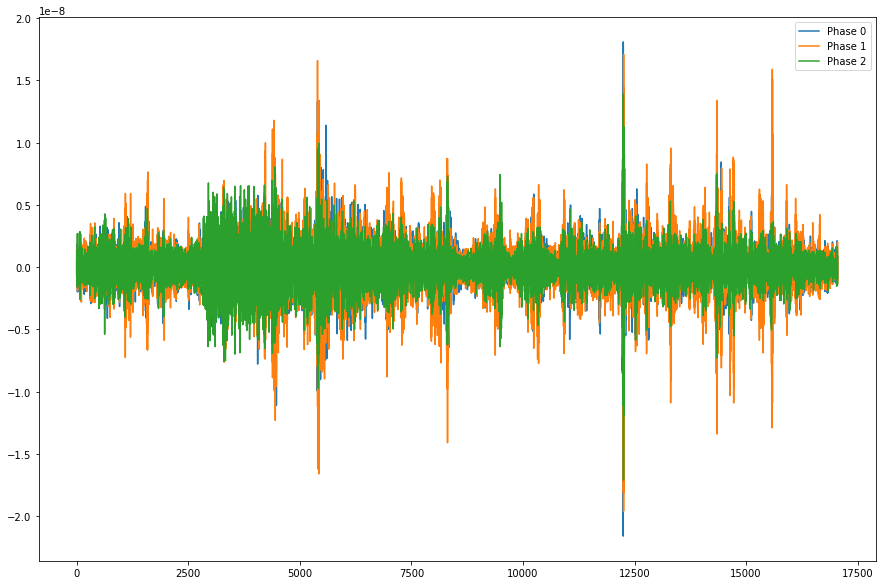

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(np_signals[0, 0, :], label='Phase 0')
plt.plot(np_signals[0, 1, :], label='Phase 1')
plt.plot(np_signals[0, 2, :], label='Phase 2')
plt.legend()
plt.show()

In [13]:
def sample(signal, kernel_size):
    sampled = np.zeros((signal.shape[0], signal.shape[1], signal.shape[2]//kernel_size))
    for i in range(signal.shape[2]//kernel_size):
        begin = kernel_size * i
        end = min(kernel_size * (i + 1), signal.shape[2])
        sampled[:, :, i] = np.mean(signal[:, :, begin:end], axis=2)
    return sampled

In [14]:
sampled = sample(np_signals, 10)

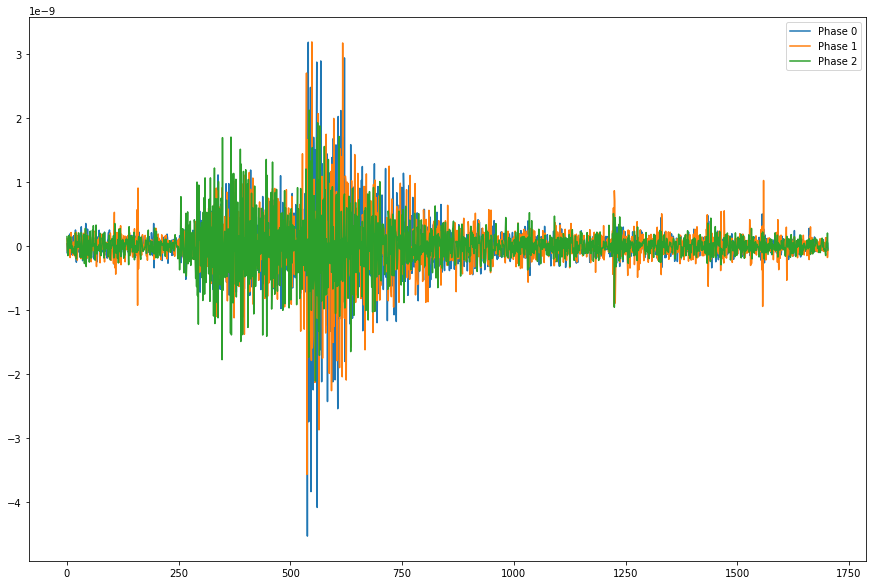

In [15]:
plt.figure(figsize=(15, 10))
plt.plot(sampled[0, 0, :], label='Phase 0')
plt.plot(sampled[0, 1, :], label='Phase 1')
plt.plot(sampled[0, 2, :], label='Phase 2')
plt.legend()
plt.show()

# FFT

In [16]:
from numpy.fft import *

In [30]:
def fft_total_data(fmax, data):
    #여기서는 samplign data의 정보는 없다
    #1초에 얼마 2초에 얼마 했느지 정보는 없음 ...
    dt = 1 / fmax  # samplign period ,sampling rate
    n = len(data)
    Fs = dt
    T = n/Fs
    f = np.arange(0, n)
    freq = f/T
    #freq = freq[range(int(n / 2))]
    Y = np.fft.fft(data) / n
    #Y = Y[range(int(n / 2))]

    plt.plot(f[0:int(n / 2 + 1)], np.abs(Y[0:int(n / 2 + 1)]))
    plt.xlabel('frequency(Hz)');
    plt.ylabel('abs(xf)');
    plt.show()

    fft_data = np.fft.fft(data)

In [31]:
y_data = sampled[0, 0, :]

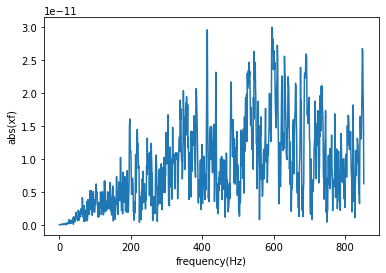

In [32]:
fft_total_data(20, y_data)

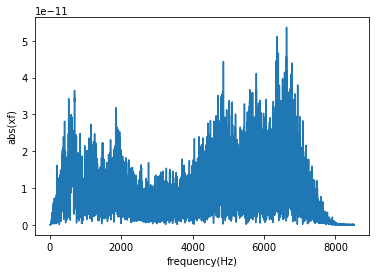

In [33]:
fft_total_data(20,  np_signals[0, 0, :])

In [48]:
np_signals[0, 0, :]
len(signals['_x'])

17049

# Speriodogram
http://thomas-cokelaer.info/software/spectrum/html/user/ref_fourier.html

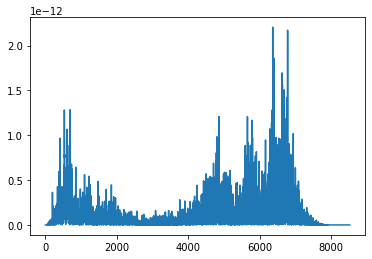

In [50]:
from spectrum import *
from pylab import plot
p = speriodogram(np_signals[0, 0, :])
plot(p)

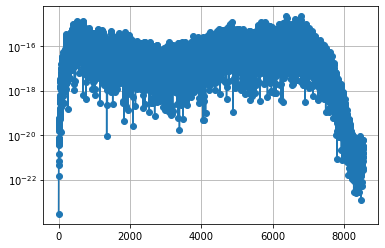

In [56]:
from pylab import *
from spectrum import *
semi_data=semilogy(speriodogram(np_signals[0, 0, :], detrend=False, sampling=1024), marker='o')
grid(True)

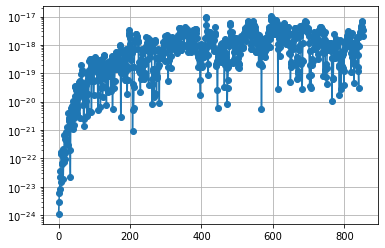

In [58]:
from pylab import *
from spectrum import *
semi_data=semilogy(speriodogram(sampled[0, 0, :], detrend=False, sampling=1024), marker='o')
grid(True)

In [57]:
semi_data

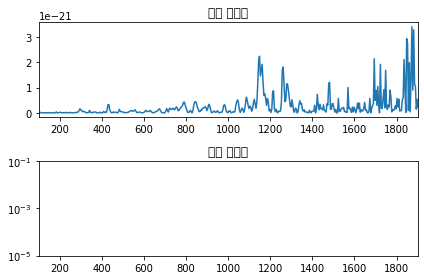

In [46]:
from scipy import signal

f, P = signal.periodogram(np_signals[0, 0, :], len(signals['_x']), nfft=2**12)

plt.subplot(211)
plt.plot(f, P)
plt.xlim(100, 1900)
plt.title("선형 스케일")

plt.subplot(212)
plt.semilogy(f, P)
plt.xlim(100, 1900)
plt.ylim(1e-5, 1e-1)
plt.title("로그 스케일")

plt.tight_layout()
plt.show()

In [ ]:
#

##  Haar wavelet coefficients

## Mutual information /Cross Entropy